In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df_sep = pd.read_csv('Sep_basefee.csv')
base_fees = pd.read_csv('0805-0915_basefee.csv')

## base fee plot
- plot the base fee from 08/05-09/15

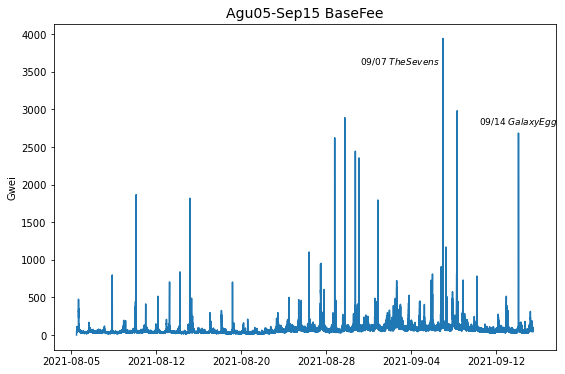

In [12]:

fig, ax = plt.subplots(figsize=(9, 6))
ax.text(170000,3600, r'09/07 $The Sevens$', fontsize=9)
ax.text(240000,2800, r'09/14 $Galaxy Egg$', fontsize=9)

x_time =[base_fees.iloc[0].block_date,base_fees.iloc[50000].block_date,
         base_fees.iloc[100000].block_date,base_fees.iloc[150000].block_date,
         base_fees.iloc[200000].block_date,base_fees.iloc[250000].block_date]
x = [0,50000,100000,150000,200000,250000]
y=base_fees.base_fee.values

ax.plot(y)

plt.xticks(x,x_time)
plt.title('Agu05-Sep15 BaseFee',fontsize=14)
plt.ylabel('Gwei');


## 09/14 Plot tip, base fee, and gas price in for a NFT Drop/Mint
- Public mint on 09/14 https://twitter.com/galaxy_eggs/status/1437527047098834948
- use df_sep for base_fee
- use 0914_fees for tip (get avg tip) and max_priority_fee (get avg max_priority_fee)
- merge the 2 dataframes on the 0914_fees

In [7]:
## use df_sep for base_fee
## use 0914_fees for tip (get avg tip) and max_fee (get avg max_fee)

base_fee_0914 = df_sep[df_sep.block_date=='2021-09-14']
fees_0914 = pd.read_csv('0914_fees.csv')

df4 = fees_0914[(fees_0914.block_hour==15)|(fees_0914.block_hour==16)]
base_fee_0914 = df_sep[df_sep.block_date=='2021-09-14']

In [15]:
## get avg tip and avg max_priority_fee

tip_mean2 = [np.mean(df4[df4.time.values==i].max_priority_fee) for i in pd.unique(df4.time.values)]
gp_mean2 = [np.mean(df4[df4.time.values==i].gas_price) for i in pd.unique(df4.time.values)]
time2 = [i for i in pd.unique(df4.time.values)]
df5 = pd.DataFrame({'max_priority_fee_mean':tip_mean2,'gas_price_mean': gp_mean2,'time':time2})
df5[:2]

,max_priority_fee_mean,gas_price_mean,time
0,132.457253,123.947927,15:00:02
1,10.121006,70.487353,15:00:07


In [11]:
## merge the 2 dfs
df6 = base_fee_0914.merge(df5,on='time',how='right')
df6[:2]

,block_number,block_date,block_hour,time,base_fee,max_priority_fee_mean,gas_price_mean
0,13224527,2021-09-14,15,15:00:02,61.507904,132.457253,123.947927
1,13224528,2021-09-14,15,15:00:07,57.880028,10.121006,70.487353


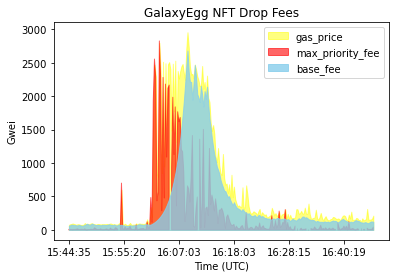

In [13]:
## The yellow spike is the average gas price/block, 
## the red spikes are the avg max priority fees/block, 
## The blue spike is the base fee

x=list(df6[200:450].time.values)
y1=list(df6[200:450].max_priority_fee_mean.values)
y2=list(df6[200:450].base_fee.values)
y3=list(df6[200:450].gas_price_mean.values)

# Change the color and its transparency
plt.fill_between(x, y3, color="yellow", alpha=0.5,label='gas_price')
plt.fill_between(x, y1, color="red", alpha=0.6,label='max_priority_fee')
plt.fill_between(x, y2, color="skyblue", alpha=0.8,label='base_fee')

plt.xticks(x[::45])
plt.title('GalaxyEgg NFT Drop Fees')
plt.xlabel('Time (UTC)')
plt.ylabel('Gwei')
plt.legend(loc='upper right')
plt.show()